<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Lab - 4</h3></center> 
<center><h3> </h3></center> 
<center><h3> scikit-learn</h3></center> 



### Installation
On Google colab `sklearn` is already installed

In [1]:
# !pip install sklearn
# !pip install seaborn==0.11

### Import

In [2]:
import sklearn

# [1] Introduction

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. Scikit-Learn is characterized by a clean, uniform, and streamlined API.  It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other built-in machine learning algorithms and models.

### Tools in Scikit-Learn
* Data Preprocessing
* Feature Selection/Extraction
* Dimensionality Reduction
* Classification
* Regression
* Clustering
* Density Estimation
* Model Selection


Most commonly, the steps in using the Scikit-Learn APIs are as follows:

* Pre-process data.
*   Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
*   Choose model hyperparameters by instantiating this class with desired values.
*   Arrange data into a features matrix and target vector following the discussion above.
*   Fit the model to your data by calling the `fit()` method of the model instance.
*   Apply the Model to new data:
    *   For supervised learning, often we predict labels for unknown data
 using the `predict()` method.
    *   For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.

  






## Download Iris dataset

In [3]:
from sklearn import datasets

# load iris dataset
iris = datasets.load_iris()
X_iris = iris.data  
y_iris = iris.target

iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [4]:
X_iris.shape, y_iris.shape

((150, 4), (150,))

In [5]:
X_iris[0:3], y_iris[0:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 array([0, 0, 0]))

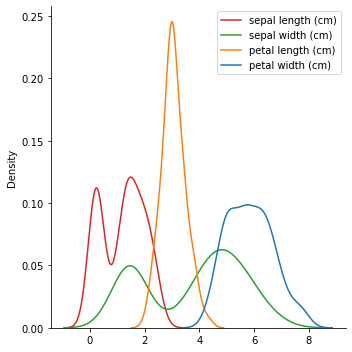

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=X_iris, kind='kde', legend=False);
plt.legend(iris.feature_names);


#[2] Preprocessing

## Feature Encoding

1. Input: [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
2. Label: [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) and [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)



In [7]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [9]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit_transform(['yes', 'no', 'no', 'yes'])

array([[1],
       [0],
       [0],
       [1]])

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

list(le.classes_)
le.transform(["tokyo", "tokyo", "paris"])
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

## Normalization


In [11]:
from sklearn.preprocessing import minmax_scale
X_iris_scaled = minmax_scale(X_iris)

X_iris_scaled[0:3]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

In [12]:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

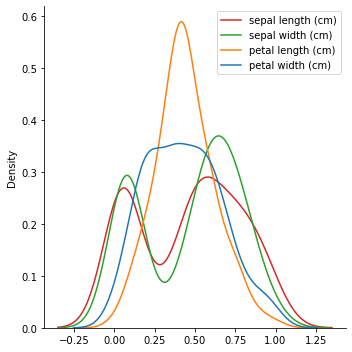

In [13]:
sns.displot(data=X_iris_scaled, kind='kde', legend=False);
plt.legend(iris.feature_names);

## Feature selection




In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_selected_feat_iris = SelectKBest(chi2, k=2).fit_transform(X_iris_scaled, y_iris)
X_selected_feat_iris.shape

(150, 2)

In [15]:
import pandas as pd
df = pd.DataFrame(X_iris, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



# [3] Sklearn Pipeline


### Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_iris, y_iris, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=76 #  To guarantee that the split will always be the same
                                                    )  


In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 2), (105,), (45, 2), (45,))

### Fit a Classifier Model

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

### Score and Confusion Matrix

In [19]:
classifier.score(X_test, y_test)

0.9777777777777777

In [20]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0,
       0])

In [21]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [22]:
metrics.confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

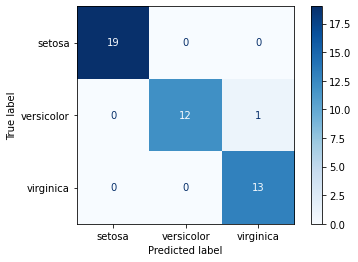

In [23]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Blues)

# [4] House Price Prediction - Regression


In [24]:
from sklearn import datasets

# load iris dataset
d_housing = datasets.fetch_california_housing()
X = d_housing.data  
y = d_housing.target

d_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [25]:
X.shape, y.shape

((20640, 8), (20640,))

In [26]:
import pandas as pd
df_housing = pd.DataFrame(X, columns=d_housing.feature_names)

In [27]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [28]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [29]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### Linear Regression

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_housing, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=76)  

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.598727562729147

In [31]:
regressor.predict(X_test[0:10])

array([1.25318167, 2.34407458, 2.58640119, 1.78405408, 1.27349142,
       3.07178571, 0.96065724, 2.78040214, 0.70305497, 0.87464286])

In [32]:
y_test[0:10]

array([0.774, 1.992, 2.168, 1.505, 1.625, 4.029, 1.463, 3.821, 1.383,
       1.146])

Using Scaling and Feature Selection for Regression

In [33]:
from sklearn.preprocessing import minmax_scale
df_housing_scaled = minmax_scale(df_housing)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_selected_feat_housing = SelectKBest(f_regression, k=6).fit_transform(df_housing, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_housing, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=76)
  
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

(14448, 6) (6192, 6) (14448,) (6192,)


In [34]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.7285819817202318


### Fetching Weights and Bias from the model

In [35]:
bias = regressor.intercept_
weights = regressor.coef_ 

print(f"Weights -> {weights}")
print(f"Bias -> {bias}")

Weights -> [ 0.43987179  0.00969571 -0.10598027  0.63178084 -0.42445209 -0.4404535 ]
Bias -> -37.56285762938923


In [36]:
sum(X_test[0]*weights) + bias

1.248467066591978

In [37]:
regressor.predict([X_test[0]])

array([1.24846707])

# [5] Decision Trees 

<a href="https://towardsdatascience.com/understanding-random-forest-58381e0602d2" rel="DT">![](https://miro.medium.com/max/1000/1*LMoJmXCsQlciGTEyoSN39g.jpeg)</a>

Random Forest

<a href="https://towardsdatascience.com/understanding-random-forest-58381e0602d2" rel="DT">![](https://miro.medium.com/max/1000/1*VHDtVaDPNepRglIAv72BFg.jpeg)</a>

https://scikit-learn.org/stable/modules/tree.html

In [38]:
## House Price - Regression
X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_housing, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=76 #  To guarantee that the split will always be the same
                                                    ) 

# Decision Trees
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree: RMSE -> {rmse}")

# Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest: RMSE -> {rmse}")

Decision Tree: RMSE -> 0.7125195536219145
Random Forest: RMSE -> 0.5095412606467496


In [39]:
## Iris - Classification
X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_iris, y_iris, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=76 #  To guarantee that the split will always be the same
                                                    ) 

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(f"Decision Tree: Accuracy Score -> {score}")

# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(f"Random Forest: Accuracy Score -> {score}")

Decision Tree: Accuracy Score -> 0.9555555555555556
Random Forest: Accuracy Score -> 0.9777777777777777


# [6] Cross Validation

<a href="https://scikit-learn.org/stable/modules/cross_validation.html" rel="K fold Cross Val">![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)</a>



In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(f"Scores ==> {scores}")
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores ==> [0.95238095 1.         0.9047619  0.9047619  0.95238095]
Mean Accuracy: 0.94 (+/- 0.07)


# EXERCISES

### Text Dataset

1. Download any text dataset from Sklearn for classification task. (*for example fetch_20newsgroups*)
2. Preprocess(*remove stopwords, special characters, spaces, etc*) from the data.
3. Extract features from text dataset using CountVectorizer or TfidfVectorizer.  
(*as the model needs numbers and these features will become the X_train columns*)
4. Convert the Ylabels into numbers (if in text) using LabelEncoder.
5. Train the Naive Bayes classifier and compare results with another classifier of your choice.(*such as SVM, Decision Tree, AdaBoost*)   
6. Plot confusion matrix to analyze your results. 

In [41]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
import numpy as np

news_data = fetch_20newsgroups_vectorized(subset='all', return_X_y=False)
target_names = news_data.target_names
X = news_data.data
y = news_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

Dataset 20newsgroup, train_samples=16961, n_features=130107, n_classes=20


In [42]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7989389920424403

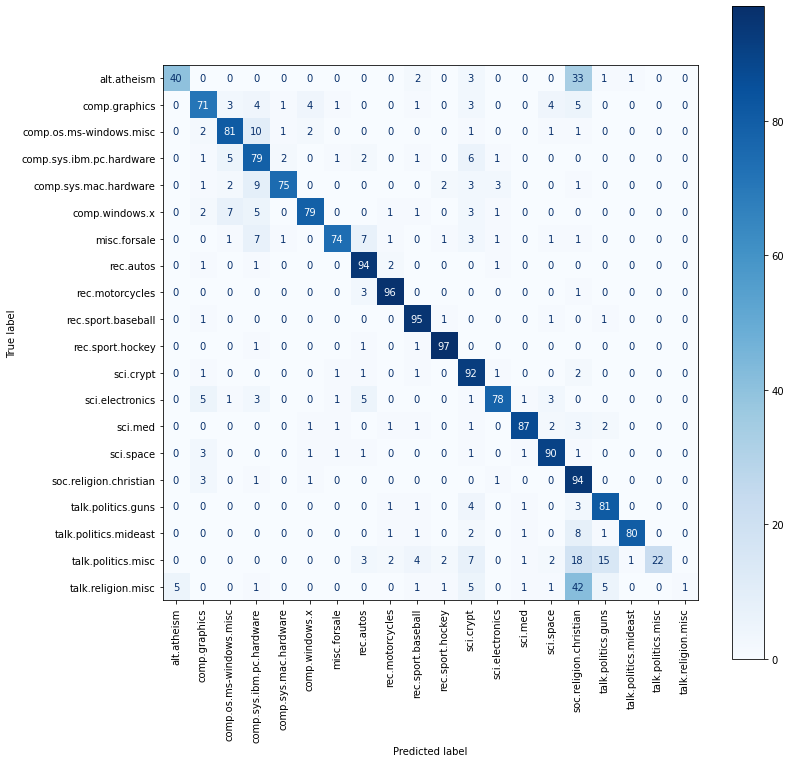

In [43]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=target_names, ax=ax, 
                                cmap=plt.cm.Blues, xticks_rotation='vertical')

In [44]:
from sklearn.svm import SVC
clf = SVC()

n_samples = 5000
clf.fit(X_train[:n_samples], y_train[:n_samples])

clf.score(X_test, y_test)

0.7326259946949603

Bonus Exercises to try

https://github.com/mpfrush/Python-Scikit-Learn-Exercises/

# REFERENCES

1.  https://scikit-learn.org/stable/tutorial/index.html
2.  https://scikit-learn.org/stable/user_guide.html
3.  https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn  


## Cheatsheet:
1. https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf
2. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html